In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
x = df.drop(columns= ["Outcome"],axis = 1)

y = df["Outcome"]

In [5]:
x.shape,y.shape

((768, 8), (768,))

In [6]:
### splitting the data set in train test split

x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                train_size = 0.8,
                                                random_state= 42

)

In [7]:
x_train.shape,x_test.shape,y_train.shape

((614, 8), (154, 8), (614,))

In [8]:
## scaling the data set

# to avoid the domination of bigger values on smaller values

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [9]:
display(x_train_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [10]:
display(x_test_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
149,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
150,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
151,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
152,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


## Building Model Architecture

In [11]:
# creating the instance of model

model = tf.keras.Sequential(name = "Main_container")


# adding the input layer to model
model.add(tf.keras.layers.Input(shape = [8],name = "input_layer"))

#creating the 1st hidden layer
model.add(tf.keras.layers.Dense(units = 9,activation = "relu",name = "hidden_layer_1"))

# creating 2nd hidden layer
model.add(tf.keras.layers.Dense(units = 8,activation = "relu",name = "hidden_layer_2"))

# creating 3rd hidden layer
model.add(tf.keras.layers.Dense(units = 4, activation = "relu",name = "hidden_layer_3"))

# creating an output layer
model.add(tf.keras.layers.Dense(units = 1 ,activation = "sigmoid",name = "output_layer"))

## weight initilize

In [12]:
model.layers[1].get_weights()

[array([[-0.34824467, -0.09116179, -0.45934448, -0.3170846 ,  0.2056998 ,
          0.03241968, -0.07961214, -0.5200048 ],
        [ 0.24217725, -0.23858392,  0.58587635, -0.18200582, -0.54627126,
         -0.06496102,  0.20467305, -0.20148581],
        [-0.52235794, -0.19142273, -0.31929109, -0.11293209,  0.14225334,
         -0.44980234,  0.11282009,  0.1441651 ],
        [ 0.23799354, -0.01073104,  0.41882074,  0.40209132, -0.0372988 ,
         -0.44567078,  0.5256258 , -0.28400317],
        [-0.36280698,  0.23095125,  0.43209982, -0.12648028,  0.48147237,
         -0.18562675,  0.05717427, -0.156315  ],
        [-0.13296875,  0.2922578 , -0.18547207,  0.09341967,  0.35872203,
         -0.1085721 ,  0.31560332,  0.521991  ],
        [-0.5693137 ,  0.5337645 ,  0.5176853 ,  0.37672794, -0.00705802,
         -0.4709094 , -0.39681092,  0.34253705],
        [ 0.2361818 , -0.10043022, -0.39456248,  0.44134152,  0.15651596,
          0.0964607 , -0.1734263 ,  0.5280678 ],
        [-0.1637

In [13]:
model.summary()   # input = 8

Model: "Main_container"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 9)                 81        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 80        
                                                                 
 hidden_layer_3 (Dense)      (None, 4)                 36        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 202 (808.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


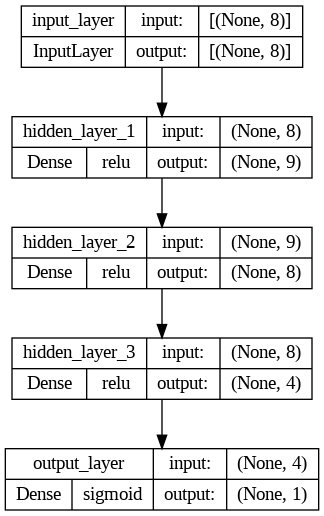

In [14]:
plot_model(
    model,
    show_shapes = True,
    show_layer_names = True,
    show_layer_activations = True
)

In [15]:
# once the architecture is being created next step is to add functionality to the model

model.compile(
            loss = "binary_crossentropy",
            optimizer = "adam",
            metrics = ["accuracy"]
)

In [16]:
# now lets fit the data

history = model.fit(
                x_train_scaled,
                y_train,
                verbose = True,
                batch_size = 16,
                validation_split = 0.2,
                epochs = 100,
                workers = 10,
                use_multiprocessing = True
)

Epoch 1/100
31/31 [==============================] - 6s 11ms/step - loss: 0.6675 - accuracy: 0.6619 - val_loss: 0.6805 - val_accuracy: 0.6098
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6640 - val_loss: 0.6637 - val_accuracy: 0.6098
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.6640 - val_loss: 0.6473 - val_accuracy: 0.6098
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.6640 - val_loss: 0.6310 - val_accuracy: 0.6098
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5890 - accuracy: 0.6640 - val_loss: 0.6133 - val_accuracy: 0.6098
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5711 - accuracy: 0.6640 - val_loss: 0.5971 - val_accuracy: 0.6098
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.6640 - val_loss: 0.5823 - val_accuracy: 0.6098
Epoch 8/100


In [17]:
#history.history

In [18]:
# we can plot accuracy against epochs and losses

def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("Model "+ keyword)
  plt.ylabel(keyword)
  plt.xlabel("epochs")

  plt.legend(["Training Data","Validation_Data"])

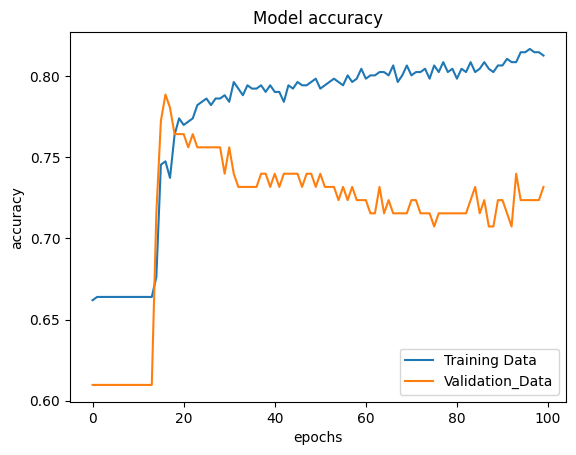

In [19]:
plotting(history,"accuracy")

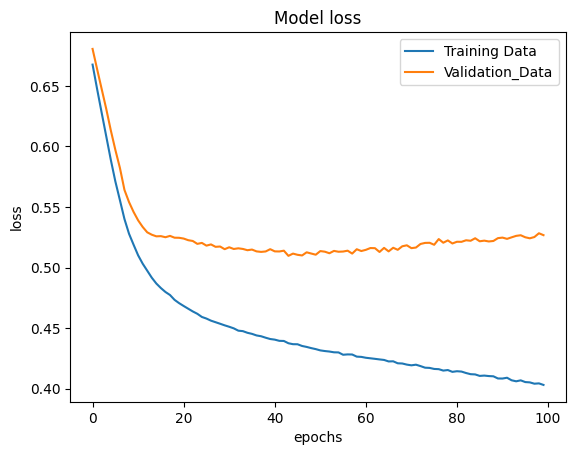

In [20]:
plotting(history,"loss")

In [21]:
# prdicting on test data

y_logs = model.predict(x_test_scaled)

y_pred = np.where(y_logs>0.5,1,0)

y_pred[:10]

5/5 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)

print("Accuracy on testing data is : ",acc)

Accuracy on testing data is :  0.7077922077922078


## Using Multiple Optimizers

"""
tf.keras.optimizers.RMSprop()
tf.keras.optimizers.Adam()
tf.keras.optimizers.Adadelta()
tf.keras.optimizers.Adagrad()

"""


In [23]:
# # creating the instance of model

# model = tf.keras.Sequential(name = "Main_container")


# # adding the input layer to model
# model.add(tf.keras.layers.Input(shape = [8],name = "input_layer"))

# #creating the 1st hidden layer
# model.add(tf.keras.layers.Dense(units = 9,activation = "relu",name = "hidden_layer_1"))

# # creating 2nd hidden layer
# model.add(tf.keras.layers.Dense(units = 8,activation = "relu",name = "hidden_layer_2"))

# # creating 3rd hidden layer
# model.add(tf.keras.layers.Dense(units = 4, activation = "relu",name = "hidden_layer_3"))

# # creating an output layer
# model.add(tf.keras.layers.Dense(units = 1 ,activation = "sigmoid",name = "output_layer"))


# # once the architecture is being created next step is to add functionality to the model

# model.compile(
#             loss = "binary_crossentropy",
#             optimizer = tf.keras.optimizers.Adagrad(),
#             metrics = ["accuracy"]
# )
# # now lets fit the data

# history = model.fit(
#                 x_train_scaled,
#                 y_train,
#                 verbose = True,
#                 batch_size = 16,
#                 validation_split = 0.2,
#                 epochs = 2,
#                 workers = 10,
#                 use_multiprocessing = True
# )

#Adam Optimizer

In [24]:
"""
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam",
    **kwargs
)
"""

'\ntf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    weight_decay=None,\n    clipnorm=None,\n    clipvalue=None,\n    global_clipnorm=None,\n    use_ema=False,\n    ema_momentum=0.99,\n    ema_overwrite_frequency=None,\n    jit_compile=True,\n    name="Adam",\n    **kwargs\n)\n'

In [25]:
"""

Arguments

learning_rate: A tf.Tensor, floating point value, a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.

beta_1: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 1st moment estimates. Defaults to 0.9.

beta_2: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 2nd moment estimates. Defaults to 0.999.

epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to 1e-7.

amsgrad: Boolean. Whether to apply AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and beyond". Defaults to False.

name: String. The name to use for momentum accumulator weights created by the optimizer.

weight_decay: Float, defaults to None. If set, weight decay is applied.

clipnorm: Float. If set, the gradient of each weight is individually clipped so that its norm is no higher than this value.

clipvalue: Float. If set, the gradient of each weight is clipped to be no higher than this value.

global_clipnorm: Float. If set, the gradient of all weights is clipped so that their global norm is no higher than this value.

use_ema: Boolean, defaults to False. If True, exponential moving average (EMA) is applied. EMA consists of computing an exponential moving average of the weights of the model (as the weight values change after each training batch), and periodically overwriting the weights with their moving average.

ema_momentum: Float, defaults to 0.99. Only used if use_ema=True. This is the momentum to use when computing the EMA of the model's weights: new_average = ema_momentum * old_average + (1 - ema_momentum) * current_variable_value.

ema_overwrite_frequency: Int or None, defaults to None. Only used if use_ema=True. Every ema_overwrite_frequency steps of iterations, we overwrite the model variable by its moving average. If None, the optimizer does not overwrite model variables in the middle of training, and you need to explicitly overwrite the variables at the end of training by calling optimizer.finalize_variable_values() (which updates the model variables in-place). When using the built-in fit() training loop, this happens automatically after the last epoch, and you don't need to do anything.

jit_compile: Boolean, defaults to True. If True, the optimizer will use XLA compilation. If no GPU device is found, this flag will be ignored.

mesh: optional tf.experimental.dtensor.Mesh instance. When provided, the optimizer will be run in DTensor mode, e.g. state tracking variable will be a DVariable, and aggregation/reduction will happen in the global DTensor context.

**kwargs: keyword arguments only used for backward compatibility.

"""

'\n\nArguments\n\nlearning_rate: A tf.Tensor, floating point value, a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.\n\nbeta_1: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 1st moment estimates. Defaults to 0.9.\n\nbeta_2: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 2nd moment estimates. Defaults to 0.999.\n\nepsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to 1e-7.\n\namsgrad: Boolean. Whether to apply AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and beyon

In [26]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [27]:

input_data = (6,148,72,35,0,33.6,0.627,50)

input_data = np.asarray(input_data)

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = scaler.transform(input_data_reshape)

prediction = model.predict(x_test_scaling)

#print(prediction[0][0])

y_pred = np.where(prediction >0.5,1,0)

if y_pred[0][0] ==1 :
  print("person is suffering from diabetes".upper())

else:
  print("person is not suffering from diabetes".upper())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
PERSON IS SUFFERING FROM DIABETES


##Dump the model

In [28]:
import pickle

filename = "trained_model.sav"
pickle.dump(model,open(filename,"wb"))

filename_sc = "scaler.pkl"
pickle.dump(scaler,open(filename_sc,"wb"))

## Load the model

In [29]:
loaded_model = pickle.load(open("trained_model.sav","rb"))

loaded_scaler = pickle.load(open("scaler.pkl","rb"))

In [30]:
input_data = (6,148,72,35,0,33.6,0.627,50)

input_data = np.asarray(input_data)

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(x_test_scaling)

y_pred = np.where(prediction >0.5,1,0)

if y_pred[0][0] ==1 :
  print("person is suffering from diabetes".upper())

else:
  print("person is not suffering from diabetes".upper())

1/1 [==============================] - 0s 55ms/step
PERSON IS SUFFERING FROM DIABETES


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [42]:
 %%writefile app.py

 import numpy as np
 import pandas as pd
 import streamlit as st
 import pickle

 # loading the model
 loaded_model = pickle.load(open("/content/trained_model.sav","rb"))

 # loading scaler object also
 loaded_scaler = pickle.load(open("/content/scaler.pkl","rb"))

 def diabetes_prediction(input_data):

    input_data = np.asarray(input_data)

    input_data_reshape = input_data.reshape(1,-1)

    x_test_scaling = loaded_scaler.transform(input_data_reshape)

    prediction = loaded_model.predict(x_test_scaling)

    y_pred = np.where(prediction>0.5,1,0)

    if y_pred[0][0] ==1 :
      st.text("person is suffering from diabetes".upper())

    else:
      st.text("person is not suffering from diabetes".upper())


def main():

    st.title("Diabetes Prediction Web Application")

    Pregnancies = st.text_input("Pregnancies")
    Glucose =  st.text_input("Glucose")
    BloodPressure = st.text_input("BloodPressure")
    SkinThickness = st.text_input("SkinThickness")
    Insulin = st.text_input("Insulin")
    BMI = st.text_input("BMI")
    DiabetesPedigreeFunction = st.text_input("DiabetesPedigreeFunction")
    Age = st.text_input("Age")


    diagnosis = ""

    # creating the button

    if st.button("Diabetes Test Result"):
      diagnosis = diabetes_prediction([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI,DiabetesPedigreeFunction,Age])

    st.success(diagnosis)

if __name__ == '__main__':
  main()

Overwriting app.py


In [33]:
pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=604d97c8910d5bc2d19792899c074f6f32291ba26610ea3d3545b4e630df8541
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [34]:
pip install protobuf==3.20.*

In [35]:
#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.6/407.6 kB 9.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of google-api-core[grpc] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 8.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of google-cloud-appengine-logging to determine which version is compatible with other requirements. This could take a while.
Reason for being yanked: Required python version not configured correctly (https://github.com/protocolbuffers/protobuf/issues/10076)
  Attempting uninstall: protobuf
    Found existing inst

In [36]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [37]:
pip install --upgrade "protobuf<=3.20.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.0
    Uninstalling protobuf-4.21.0:
      Successfully uninstalled protobuf-4.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-appengine-logging 1.1.5 requires protobuf<5.0.0dev,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
google-cloud-audit-log 0.2.5 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery-connection 1.12.1 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!

In [38]:
!pip install 'protobuf<=3.20.1' --force-reinstall

  Using cached protobuf-3.20.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-appengine-logging 1.1.5 requires protobuf<5.0.0dev,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
google-cloud-audit-log 0.2.5 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery-connection 1.12.1 requires google-api-core[g

In [43]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.169.1:8501

npx: installed 22 in 2.179s
your url is: https://vast-bats-design.loca.lt
2023-10-10 01:44:29.129858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-10 01:44:31.604570: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
1/1 [==============================] - 1s 661ms/step
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitt

In [ ]:
http://34.82.169.1:8501   put this : 34.82.169.1